In [59]:
import networkx as nx
import random
import pandas as pd
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

In [60]:
ncons=1000  #number of consumers
norg=50    #number of organisations
nemp=200  #number of employers

#scons=np.random.rand(ncons) #consumer score (randomly generated)
scons=np.array(pd.read_csv('Desktop/Data/IIM intern/final cons scores (16th dec).csv')['x'])
sorg=np.random.normal(0.5, 0.1, norg)   #organisations score
semp=np.random.normal(0.5, 0.1, nemp)  #employer score
semp[semp>1]=1
semp[semp<0]=0

In [61]:
'''
#edgelist between consumers and employers (with weights)
consprop=[0.2,0.3,0.5]
consprop = [element * ncons for element in consprop]
consprop = [int(x) for x in consprop]
conswt=[0.25,0.5,0.7]
cnt1=0
ed3=pd.DataFrame()
for i in range(len(consprop)):
    g=nx.random_partition_graph([consprop[i], nemp], 0.5, conswt[i])
    edg=pd.DataFrame(g.edges())
    edg3=edg[(((edg[0]<consprop[i]) & (edg[1]>consprop[i]-1)) | ((edg[0]>consprop[i]-1) & (edg[1]<consprop[i])))]
    edg3[1]-=consprop[i]
    edg3[0]+=cnt1
    print(edg3)
    cnt1+=consprop[i]
    ed3=ed3.append(edg3)
ed3.reset_index(inplace=True, drop=True)
ed3
'''
#edgelist between consumers and employers
g=nx.random_partition_graph([ncons,nemp],0.5, 0.25)  #connection probability=0.25 between emp and consumers
#partition = g.graph["partition"]
#org=list(partition[0])
#cons=list(partition[1])
ed=pd.DataFrame(g.edges())
ed3=ed[(((ed[0]<ncons) & (ed[1]>ncons-1)) | ((ed[0]>ncons-1) & (ed[1]<ncons)))] #Dataframe with only connections between org and cons
ed3[1]-=ncons
ed3.reset_index(inplace=True, drop=True)
ed3


<ipython-input-61-afbc73a711c5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed3[1]-=ncons


,0,1
0,0,26
1,0,44
2,0,46
3,0,55
4,0,58
...,...,...
49845,999,4
49846,999,7
49847,999,9
49848,999,14


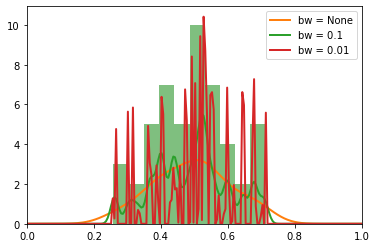

In [62]:
import scipy.stats

plt.hist(sorg, 10, facecolor='green', alpha=0.5);

# plot density estimates
t_range = np.linspace(0,1,200)
bw_values =  [None, 0.1, 0.01]
# generate a list of kde estimators for each bw
kde = [scipy.stats.gaussian_kde(sorg,bw_method=bw) for bw in bw_values]
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2, label='bw = '+str(bw))
plt.xlim(0,1)
plt.legend(loc='best')

In [63]:
#for different weight proportion of organisations

orgprop=[0.2,0.3,0.5]
orgprop = [element * norg for element in orgprop]
orgprop = [int(x) for x in orgprop]
orgwt=[0.25,0.5,0.7]
cnt1=0
ed1=pd.DataFrame()
for i in range(len(orgprop)):
    g=nx.random_partition_graph([orgprop[i], ncons], 0.5, orgwt[i])
    edg=pd.DataFrame(g.edges())
    edg1=edg[(((edg[0]<orgprop[i]) & (edg[1]>orgprop[i]-1)) | ((edg[0]>orgprop[i]-1) & (edg[1]<orgprop[i])))]
    edg1[1]-=orgprop[i]
    edg1[0]+=cnt1
    print(edg1)
    cnt1+=orgprop[i]
    ed1=ed1.append(edg1)
ed1.reset_index(inplace=True, drop=True)
ed1

''''
#for uniform connections
g=nx.random_partition_graph([norg,ncons],0.5, 0.25)  #connection probability=0.25 between org and consumers
partition = g.graph["partition"]
org=list(partition[0])
cons=list(partition[1])
ed=pd.DataFrame(g.edges())
ed1=ed[(((ed[0]<norg) & (ed[1]>norg-1)) | ((ed[0]>norg-1) & (ed[1]<norg)))] #Dataframe with only connections between org and cons
ed1[1]-=norg
ed1.reset_index(inplace=True, drop=True)
ed1
'''



<ipython-input-63-68b86c420eea>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg1[1]-=orgprop[i]
<ipython-input-63-68b86c420eea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg1[0]+=cnt1


      0    1
3     0    1
4     0    2
5     0    4
6     0    7
7     0    8
...  ..  ...
2516  9  979
2517  9  981
2518  9  985
2519  9  993
2520  9  999

[2498 rows x 2 columns]


<ipython-input-63-68b86c420eea>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg1[1]-=orgprop[i]
<ipython-input-63-68b86c420eea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg1[0]+=cnt1


       0    1
6     10    0
7     10    2
8     10    3
9     10    4
10    10    5
...   ..  ...
7628  24  995
7629  24  996
7630  24  997
7631  24  998
7632  24  999

[7578 rows x 2 columns]
        0    1
12     25    1
13     25    2
14     25    3
15     25    4
16     25   10
...    ..  ...
17744  49  994
17745  49  995
17746  49  996
17747  49  998
17748  49  999

[17600 rows x 2 columns]


<ipython-input-63-68b86c420eea>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg1[1]-=orgprop[i]
<ipython-input-63-68b86c420eea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg1[0]+=cnt1


'\'\n#for uniform connections\ng=nx.random_partition_graph([norg,ncons],0.5, 0.25)  #connection probability=0.25 between org and consumers\npartition = g.graph["partition"]\norg=list(partition[0])\ncons=list(partition[1])\ned=pd.DataFrame(g.edges())\ned1=ed[(((ed[0]<norg) & (ed[1]>norg-1)) | ((ed[0]>norg-1) & (ed[1]<norg)))] #Dataframe with only connections between org and cons\ned1[1]-=norg\ned1.reset_index(inplace=True, drop=True)\ned1\n'

In [64]:

#for connections between organisations and employers
cnt2=0
ed2=pd.DataFrame()
for i in range(len(orgprop)):
    g=nx.random_partition_graph([orgprop[i], nemp], 0.5, orgwt[i])
    edg=pd.DataFrame(g.edges())
    edg2=edg[(((edg[0]<orgprop[i]) & (edg[1]>orgprop[i]-1)) | ((edg[0]>orgprop[i]-1) & (edg[1]<orgprop[i])))]
    edg2[1]-=orgprop[i]
    edg2[0]+=cnt2
    print(edg2)
    cnt2+=orgprop[i]
    ed2=ed2.append(edg2)
ed2.reset_index(inplace=True, drop=True)
print(ed2)

'''
#for connections between organisations and employers (with weights)
orgprop=[0.2,0.3,0.5]
orgprop = [element * norg for element in orgprop]
orgprop = [int(x) for x in orgprop]
orgwt=[0.25,0.5,0.7]
cnt1=0
ed2=pd.DataFrame()
for i in range(len(orgprop)):
    g=nx.random_partition_graph([orgprop[i], nemp], 0.5, orgwt[i])
    edg=pd.DataFrame(g.edges())
    edg2=edg[(((edg[0]<orgprop[i]) & (edg[1]>orgprop[i]-1)) | ((edg[0]>orgprop[i]-1) & (edg[1]<orgprop[i])))]
    edg2[1]-=orgprop[i]
    edg2[0]+=cnt1
    print(edg2)
    cnt1+=orgprop[i]
    ed2=ed2.append(edg2)
ed2.reset_index(inplace=True, drop=True)
ed2
'''

     0    1
7    0    3
8    0   10
9    0   11
10   0   14
11   0   19
..  ..  ...
512  9  182
513  9  189
514  9  190
515  9  194
516  9  195

[494 rows x 2 columns]
       0    1
6     10    0
7     10    1
8     10    7
9     10    8
10    10   11
...   ..  ...
1546  24  188
1547  24  189
1548  24  193
1549  24  194
1550  24  198

[1497 rows x 2 columns]
       0    1
7     25    0
8     25    3
9     25    5
10    25    6
11    25    7
...   ..  ...
3600  49  193
3601  49  194
3602  49  196
3603  49  198
3604  49  199

[3464 rows x 2 columns]
       0    1
0      0    3
1      0   10
2      0   11
3      0   14
4      0   19
...   ..  ...
5450  49  193
5451  49  194
5452  49  196
5453  49  198
5454  49  199

[5455 rows x 2 columns]


<ipython-input-64-ed5482bd7cc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg2[1]-=orgprop[i]
<ipython-input-64-ed5482bd7cc2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edg2[0]+=cnt2
<ipython-input-64-ed5482bd7cc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

'\n#for connections between organisations and employers (with weights)\norgprop=[0.2,0.3,0.5]\norgprop = [element * norg for element in orgprop]\norgprop = [int(x) for x in orgprop]\norgwt=[0.25,0.5,0.7]\ncnt1=0\ned2=pd.DataFrame()\nfor i in range(len(orgprop)):\n    g=nx.random_partition_graph([orgprop[i], nemp], 0.5, orgwt[i])\n    edg=pd.DataFrame(g.edges())\n    edg2=edg[(((edg[0]<orgprop[i]) & (edg[1]>orgprop[i]-1)) | ((edg[0]>orgprop[i]-1) & (edg[1]<orgprop[i])))]\n    edg2[1]-=orgprop[i]\n    edg2[0]+=cnt1\n    print(edg2)\n    cnt1+=orgprop[i]\n    ed2=ed2.append(edg2)\ned2.reset_index(inplace=True, drop=True)\ned2\n'

In [65]:
#Manuel version of the above code cell
''''
org1=int(0.3*norg)
org2=int(0.3*norg)
org3=int(0.3*norg)
g1=nx.random_partition_graph([org1,ncons],0.2, 0.25)
g2=nx.random_partition_graph([org2,ncons],0.5, 0.5)
g3=nx.random_partition_graph([org3,ncons],0.7, 0.75)
edg1=pd.DataFrame(g1.edges())
edg11=edg1[(((edg1[0]<org1) & (edg1[1]>org1-1)) | ((edg1[0]>org1-1) & (edg1[1]<org1)))]
edg2=pd.DataFrame(g2.edges())
edg12=edg2[(((edg2[0]<org2) & (edg2[1]>org2-1)) | ((edg2[0]>org2-1) & (edg2[1]<org2)))]
edg12[0]+=org1
edg3=pd.DataFrame(g3.edges())
edg13=edg3[(((edg3[0]<org3) & (edg3[1]>org3-1)) | ((edg3[0]>org3-1) & (edg3[1]<org3)))]
edg13[0]+=org1+org2
ed1 = pd.concat([edg11,edg12,edg13])
ed1
'''

"'\norg1=int(0.3*norg)\norg2=int(0.3*norg)\norg3=int(0.3*norg)\ng1=nx.random_partition_graph([org1,ncons],0.2, 0.25)\ng2=nx.random_partition_graph([org2,ncons],0.5, 0.5)\ng3=nx.random_partition_graph([org3,ncons],0.7, 0.75)\nedg1=pd.DataFrame(g1.edges())\nedg11=edg1[(((edg1[0]<org1) & (edg1[1]>org1-1)) | ((edg1[0]>org1-1) & (edg1[1]<org1)))]\nedg2=pd.DataFrame(g2.edges())\nedg12=edg2[(((edg2[0]<org2) & (edg2[1]>org2-1)) | ((edg2[0]>org2-1) & (edg2[1]<org2)))]\nedg12[0]+=org1\nedg3=pd.DataFrame(g3.edges())\nedg13=edg3[(((edg3[0]<org3) & (edg3[1]>org3-1)) | ((edg3[0]>org3-1) & (edg3[1]<org3)))]\nedg13[0]+=org1+org2\ned1 = pd.concat([edg11,edg12,edg13])\ned1\n"

In [66]:
'''
iter1=2  #iterations
mode=1
df1=pd.DataFrame()   #df1=dataframe for storing org scores at every iteration
edsave=[]   #list to store ed1 at every iteration
for x in range(iter1):
    sm=np.random.rand(1)  #d 
    sorg=np.random.normal(sm, 0.3, norg)
    
    for i in range(norg):
        c=np.array(ed1[ed1[0]==i][1])  #c=array containing cons. index connected to the ith org.
        if(sorg[i]>1):
            sorg[i]=1
        elif(sorg[i]<0):
            sorg[i]=0
        #print(len(c))
        sum1=0
        for j in range(len(c)):
            sum1+=scons[c[j]]
        avg1=sum1/len(c)
        org_p=0
        Q=1
        p=(np.exp(org_p+avg1))/(1+np.exp(org_p+avg1)) #ptotalh 
        #print(p)
        p=p*Q
        if(mode==1):
            if(p>0.5):
                sorg[i]=random.uniform(p,1)
            elif(p<0.5):
                sorg[i]=random.uniform(0,p)
            else:
                sorg[i]=random.random()
        elif(mode==2):
            ran1=random.randint(0,1)
            if(ran1==0):
                var=random.choices([0,1], weights=(p,100-p), k=1)[0]
            else:
                var=random.choices([0,1], weights=(100-p,p), k=1)[0]
            if(var==1):
                sorg[i]=random.uniform(p,1)
            elif(var==0):
                sorg[i]=random.uniform(0,p)
            
        df1[x]=sorg
        #ed2=pd.DataFrame(columns=(0,1))
        for j in range(ncons):
            cons_org=(ed1[0].value_counts()[i])/ncons #number of consumers connected to org/ncons
            #cons_org*=100
            #print(cons_org)
            diff=(scons[j]-sorg[i])  #Doubt
            #print(str(diff) + ' ' +str(cons_org))
            p2=(np.exp(0.5*diff+0.5*cons_org))/(1+np.exp(0.5*diff+0.5*cons_org))
            print(str(i)+' '+str(j)+ ' ' + str(diff) + ' ' +str(cons_org)+ ' '+str(p2))
            if(p2>random.random()):
                if((len(ed1[(ed1[0]==i) & (ed1[1]==j)]))==0):   #if edge not found
                    ed1=ed1.append({0:i, 1:j}, ignore_index=True)   #then make the edge
            elif(p2==random.random()):
                if(random.random()>0.5):
                    if((len(ed1[(ed1[0]==i) & (ed1[1]==j)]))==0):
                        ed1=ed1.append({0:i, 1:j}, ignore_index=True)
                else:
                    if((len(ed1[(ed1[0]==i) & (ed1[1]==j)]))>0):
                        ed1=ed1.drop(ed1[((ed1[0] == i) & ( ed1[1] == j))].index)
            else:
                if((len(ed1[(ed1[0]==i) & (ed1[1]==j)]))>0):   #if edge found
                    ed1=ed1.drop(ed1[((ed1[0] == i) & ( ed1[1] == j))].index)   #remove the edge
    print(ed1)                
    
        #after allp:
'''
        

"\niter1=2  #iterations\nmode=1\ndf1=pd.DataFrame()   #df1=dataframe for storing org scores at every iteration\nedsave=[]   #list to store ed1 at every iteration\nfor x in range(iter1):\n    sm=np.random.rand(1)  #d \n    sorg=np.random.normal(sm, 0.3, norg)\n    \n    for i in range(norg):\n        c=np.array(ed1[ed1[0]==i][1])  #c=array containing cons. index connected to the ith org.\n        if(sorg[i]>1):\n            sorg[i]=1\n        elif(sorg[i]<0):\n            sorg[i]=0\n        #print(len(c))\n        sum1=0\n        for j in range(len(c)):\n            sum1+=scons[c[j]]\n        avg1=sum1/len(c)\n        org_p=0\n        Q=1\n        p=(np.exp(org_p+avg1))/(1+np.exp(org_p+avg1)) #ptotalh \n        #print(p)\n        p=p*Q\n        if(mode==1):\n            if(p>0.5):\n                sorg[i]=random.uniform(p,1)\n            elif(p<0.5):\n                sorg[i]=random.uniform(0,p)\n            else:\n                sorg[i]=random.random()\n        elif(mode==2):\n        

In [67]:
def func(norg, sorg, data, mode, ed, cc):
    ndata=len(data)
    for i in range(norg):
        '''
        c=np.array(ed[ed[0]==i][1])  #c=array containing cons. index connected to the ith org.
        #print(len(c))
        sum1=0
        for j in range(len(c)):
            sum1+=data[c[j]]   
        avg1=sum1/len(c)
        org_p=0
        Q=1
        p=(np.exp(org_p+avg1))/(1+np.exp(org_p+avg1)) #ptotalh 
        p=p*Q
        
        if(mode==1):
            if(p>0.5):
                sorg[i]=random.uniform(p,1)
            elif(p<0.5):
                sorg[i]=random.uniform(0,p)
            else:
                sorg[i]=random.random()
        elif(mode==2):
            ran1=random.randint(0,1)
            if(ran1==0):
                var=random.choices([0,1], weights=(p,100-p), k=1)[0]
            else:
                var=random.choices([0,1], weights=(100-p,p), k=1)[0]
            if(var==1):
                sorg[i]=random.uniform(p,1)
            elif(var==0):
                sorg[i]=random.uniform(0,p)
        '''
        
        #df[x]=sorg if above commented code isnt there, then this will be before the function call
        for j in range(ndata):
            data_org=(ed[0].value_counts()[i])/ndata #number of consumers/employers connected to org
            #data_org*=100
            #print(data_org)
            diff=(data[j]-sorg[i]) 
            E=np.random.normal(0, 0.1, 1)
            E=E[0]
            mean = [0, 0, 0]
            cov = [[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]]  # diagonal covariance
            e1,e2,e3=np.random.multivariate_normal(mean, cov, 1).T
            if(cc==0):
                #calculate semp
                c=np.array(ed3[ed3[0]==j][1])
                sum1=0
                for k in range(len(c)):
                    sum1+=semp[c[k]]
                avg1=sum1/len(c)
                p2=(np.exp((0.5+e1)*diff+(0.5+e2)*data_org+(0.5+e3)*avg1+E))/(1+np.exp((0.5+e1)*diff+(0.5+e2)*data_org+(0.5+e3)*avg1+E))
            elif(cc==1):
                #calculate scons
                c=np.array(ed3[ed3[1]==j][0])
                sum1=0
                for k in range(len(c)):
                    sum1+=scons[c[k]]
                avg1=sum1/len(c)
                p2=(np.exp((0.5+e1)*diff+(0.5+e2)*data_org+(0.5+e3)*avg1+E))/(1+np.exp((0.5+e1)*diff+(0.5+e2)*data_org+(0.5+e3)*avg1+E))
                
            #p2=(np.exp(0.5*diff+0.5*data_org))/(1+np.exp(0.5*diff+0.5*data_org))
            
            print(str(i)+' '+str(j)+ ' ' + str(diff) + ' ' +str(data_org)+ ' '+str(p2))
            if(p2>random.random()):
                if((len(ed[(ed[0]==i) & (ed[1]==j)]))==0):   #if edge not found
                    ed=ed.append({0:i, 1:j}, ignore_index=True)   #then make the edge
            elif(p2==random.random()):
                if(random.random()>0.5):
                    if((len(ed[(ed[0]==i) & (ed[1]==j)]))==0):
                        ed=ed.append({0:i, 1:j}, ignore_index=True)
                else:
                    if((len(ed[(ed[0]==i) & (ed[1]==j)]))>0):
                        ed=ed.drop(ed[((ed[0] == i) & ( ed[1] == j))].index)
            else:
                if((len(ed[(ed[0]==i) & (ed[1]==j)]))>0):   #if edge found
                    ed=ed.drop(ed[((ed[0] == i) & ( ed[1] == j))].index)   #remove the edge
        
    
    return ed
    
            
            

iter1=1  #iterations
mode=1
df2=pd.DataFrame()   #df1=dataframe for storing org scores at every iteration
edsave=[]   #list to store ed1 at every iteration
for x in range(iter1):
    sm=np.random.rand(1)  #d 
    sorg=np.random.normal(sm, 0.3, norg)
    sorg[sorg>1]=1
    sorg[sorg<0]=0
    ed1=func(norg, sorg, scons, mode, ed1, 0) #for consumers
    ed2=func(norg, sorg, semp, mode, ed2, 1)  #for employers

0 0 -0.2686742433857053 0.256 [0.49909299]
0 1 -0.2752284225757307 0.257 [0.44411628]
0 2 -0.2661797628055358 0.257 [0.46407838]
0 3 -0.2706140212677742 0.257 [0.5158497]
0 4 -0.272826178495136 0.258 [0.6407274]
0 5 -0.271574023296928 0.257 [0.50894533]
0 6 -0.2734563286703104 0.258 [0.63282194]
0 7 -0.272882926621145 0.259 [0.52412723]
0 8 -0.2702209206926441 0.259 [0.50805386]
0 9 -0.2684133391307141 0.259 [0.6261921]
0 10 -0.2751764124000786 0.259 [0.54983945]
0 11 -0.2668163254672904 0.259 [0.65488658]
0 12 -0.2737481996019035 0.259 [0.6371354]
0 13 -0.2714235020695436 0.26 [0.56745197]
0 14 -0.2659813834378983 0.261 [0.56443591]
0 15 -0.2722368097263942 0.261 [0.42457486]
0 16 -0.2716340137493814 0.261 [0.60114488]
0 17 -0.271039931177007 0.262 [0.54007481]
0 18 -0.2686531324522871 0.262 [0.55426848]
0 19 -0.2719917660483921 0.261 [0.60585163]
0 20 -0.2702585332626637 0.262 [0.54700219]
0 21 -0.2739416554490776 0.262 [0.59478941]
0 22 -0.2678155287825326 0.263 [0.56713472]
0 23 -0

In [443]:
mean = [0, 0, 0]
cov = [[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]]  # diagonal covariance
a,b,c=np.random.multivariate_normal(mean, cov, 1).T

In [444]:
print(a)
print(b)
print(c)

[0.22239676]
[0.05757973]
[0.25122147]


In [12]:
ee=np.random.normal(0, 1, 1)
ee

array([-0.53563226])

In [13]:
ee=ee[0]
ee

-0.5356322626553973

In [182]:
        '''
        ed1.drop(ed1[ed1[0]==org[i]].index, inplace=True)  
        for j in range(ncons):
            if(sorg[i]>scons[j]):
                ed1=ed1.append({0:i, 1:j}, ignore_index=True)
            elif(sorg[i]==scons[j]):
                if(random.random()>0.5):
                    ed1=ed1.append({0:i, 1:j}, ignore_index=True)
    edsave.append(np.array(ed1))            
                    '''

'\ned1.drop(ed1[ed1[0]==org[i]].index, inplace=True)  \nfor j in range(ncons):\n    if(sorg[i]>scons[j]):\n        ed1=ed1.append({0:i, 1:j}, ignore_index=True)\n    elif(sorg[i]==scons[j]):\n        if(random.random()>0.5):\n            ed1=ed1.append({0:i, 1:j}, ignore_index=True)\n    edsave.append(np.array(ed1))            \n            '

In [523]:
ed2

,0,1
0,0,5
1,0,19
2,0,24
3,0,30
4,0,32
...,...,...
5410,49,160
5411,49,167
5412,49,168
5413,49,194


In [77]:
df1

,0,1
0,0.827923,0.579738
1,0.658559,0.602662
2,0.965878,0.575622
3,0.526600,0.744277
4,0.778647,0.852816
5,0.569314,0.944836
6,0.891913,0.855205
7,0.837406,0.803132
8,0.805730,0.862658
9,0.920338,0.901491


In [909]:
#var
'''
1) lets say p=0.62 var=pick 1 with prob 0.62,
if (var==1) score = unifor(p,1)
if(var==0) score = uniform(0,p)

read about parameter estimation by agent based simulation
   reduce Computational cost (using sampling approaches)
    optimisations
    


 discrete choice models
 



1)paramter est. by sampling
2)*multiple* parameter estimation in simulations
3)parameter est. by simulated moments/minimum simulation distance
4)parameter est. using simulated annealing 
'''



'\n1) lets say p=0.62 var=pick 1 with prob 0.62,\nif (var==1) score = unifor(p,1)\nif(var==0) score = uniform(0,p)\n\nread about parameter estimation agent based simulation\n   reduce Computational cost (using sampling approaches)\n    optimisations\n    \n\n discrete choice models\n'

In [57]:
df1

,0
0,0.719502
1,0.018976
2,0.614870
3,0.725348
4,0.470426
5,0.808519
6,0.041773
7,0.670841
8,0.213455
9,0.598301


In [25]:
ed1

,0,1
0,0,6
1,0,14
2,0,17
3,0,36
4,0,38
...,...,...
49995,49,994
49996,49,995
49997,49,996
49998,49,998


In [913]:
#test
''''
edt=pd.DataFrame(columns=(0,1))
edt=edt.append({0:1, 1:2}, ignore_index=True)
edt=edt.append({0:1, 1:3}, ignore_index=True)
edt=edt.append({0:2, 1:4}, ignore_index=True)
edt=edt.append({0:2, 1:5}, ignore_index=True)
edt
'''

,0,1
0,1,2
1,1,3
2,2,4
3,2,5


In [914]:
#test
''''
edt.drop(edt[edt[0]==1].index, inplace=True)
print(edt)
'''

In [917]:
#test
''''
random.choices([0,1], weights=(62,38), k=1)[0]
'''

0

In [918]:
#test
''''
test=[]
#test=pd.DataFrame()
for i in range(4):
    test.append(np.array(ed1))
test
'''

[array([[  0,   1],
        [  0,   2],
        [  0,   8],
        ...,
        [ 49, 997],
        [ 49, 998],
        [ 49, 999]]),
 array([[  0,   1],
        [  0,   2],
        [  0,   8],
        ...,
        [ 49, 997],
        [ 49, 998],
        [ 49, 999]]),
 array([[  0,   1],
        [  0,   2],
        [  0,   8],
        ...,
        [ 49, 997],
        [ 49, 998],
        [ 49, 999]]),
 array([[  0,   1],
        [  0,   2],
        [  0,   8],
        ...,
        [ 49, 997],
        [ 49, 998],
        [ 49, 999]])]

In [1132]:
#for calculating final consumer scores
''''
from sklearn import preprocessing
dfcons=pd.read_excel('Desktop/Data/IIM intern/Final_Result (1).xlsx')
arr=np.array(dfcons.iloc[:,2])
arr=arr.reshape(-1, 1)
#arr
from numpy import inf
min_max_scaler = preprocessing.MinMaxScaler()
scaledcons = min_max_scaler.fit_transform(arr)
scaledcons=scaledcons*100
scaledcons=1/scaledcons
scaledcons
scaledcons[scaledcons == inf] = 1
pd.DataFrame(scaledcons).to_csv("cons scores.csv")
'''
#Rest part was done in R

<ipython-input-1132-c1d77e2c22e7>:5: RuntimeWarning: divide by zero encountered in true_divide
  scaledcons=1/scaledcons


In [1120]:
#test (epdf sampling)
''''
nBins=1000
count_c, bins_c, = np.histogram(scaledcons, bins=nBins)
print(count_c)
myPDF = count_c/np.sum(count_c)
dxc = np.diff(bins_c)[0];   xc = bins_c[0:-1] + 0.5*dxc
#plot_distrib1(xc,myPDF)


myCDF = np.zeros_like(bins_c)
myCDF[1:] = np.cumsum(myPDF)
#plot_line(bins_c,myCDF,xc,myPDF)

arr1=[]
def get_sampled_element():
    a = np.random.uniform(0, 1)
    return np.argmax(myCDF>=a)-1

def run_sampling(myCDF, nRuns=5000):
    X = np.zeros_like(myPDF,dtype=int)
    for k in np.arange(nRuns):
        variab=get_sampled_element()
        #arr1.append(variab)
        X[variab] += 1
    arr1.append(X/np.sum(X))
    return X/np.sum(X)

X = run_sampling(myCDF)
X
'''

[ 2  3  3  4 13  8 13 13  7  0 13  4  2  1  1  0  0  0  1  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [991]:
#test
''''
#df.loc[(df[‘Color’] == ‘Green’) & (df[‘Shape’] == ‘Rectangle’)]
if((len(ed1[(ed1[0]==0) & (ed1[1]==3)]))==0):
    print("not found")
else:
    print("found")
'''

not found


In [998]:
#test
''''
ed3=ed1.copy()
i = ed3[((ed3[0] == 0) &( ed3[1] == 1) )].index
ed3=ed3.drop(ed3[((ed3[0] == 0) &( ed3[1] == 1) )].index)
ed3
'''

,0,1
1,0,2
2,0,8
3,0,26
4,0,27
5,0,29
...,...,...
25413,49,995
25414,49,996
25415,49,997
25416,49,998


[50. 50.]


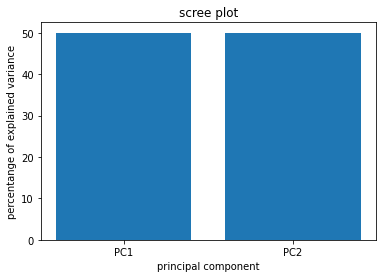

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X = [[9,4],[-9,-4],[6,-6],[-6,6]]
X=pd.DataFrame(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
new_X = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

In [6]:
X=pd.DataFrame(X)
X

,0,1
0,9,4
1,-9,-4
2,6,-6
3,-6,6
